## Check List 2 - Sensors
**2.1. Kinect**  
**2.2. Realsense**  
**2.3. ArucoStereo**  

## set running directory to project source

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import time
os.chdir(os.path.join(os.environ["RNB_PLANNING_DIR"], 'src'))

## 2.1. Kinect

In [2]:
from pkg.detector.camera.kinect import Kinect

##### create Kinect instance

In [3]:
kinect = Kinect()

##### initialize()

In [4]:
kinect.initialize()

Device configuration: 
	color_format: 3 
	(0:JPG, 1:NV12, 2:YUY2, 3:BGRA32)

	color_resolution: 5 
	(0:OFF, 1:720p, 2:1080p, 3:1440p, 4:1536p, 5:2160p, 6:3072p)

	depth_mode: 3 
	(0:OFF, 1:NFOV_2X2BINNED, 2:NFOV_UNBINNED,3:WFOV_2X2BINNED, 4:WFOV_UNBINNED, 5:Passive IR)

	camera_fps: 2 
	(0:5 FPS, 1:15 FPS, 2:30 FPS)

	synchronized_images_only: False 
	(True of False). Drop images if the color and depth are not synchronized

	depth_delay_off_color_usec: 0 ms. 
	Delay between the color image and the depth image

	wired_sync_mode: 0
	(0:Standalone mode, 1:Master mode, 2:Subordinate mode)

	subordinate_delay_off_master_usec: 0 ms.
	The external synchronization timing.

	disable_streaming_indicator: False 
	(True or False). Streaming indicator automatically turns on when the color or depth camera's are in use.




##### get_config()
* This should return camera matrix (3x3) and distortion coefficients (4, 5, or 8 element vector)

In [5]:
camera_matrix, dist_coeffs = kinect.get_config()
print("camera_matrix: {} \n {}".format(camera_matrix.shape, camera_matrix))
print("dist_coeffs: {} \n {}".format(dist_coeffs.shape, dist_coeffs))

camera_matrix: (3, 3) 
 [[1.82983423e+03 0.00000000e+00 1.91572046e+03]
 [0.00000000e+00 1.82983423e+03 1.09876086e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist_coeffs: (8,) 
 [ 7.09966481e-01 -2.73409390e+00  1.45804870e-03 -3.24774766e-04
  1.44911301e+00  5.84310412e-01 -2.56374550e+00  1.38472950e+00]


##### get_image()
  * This will return camera image (RGB order)

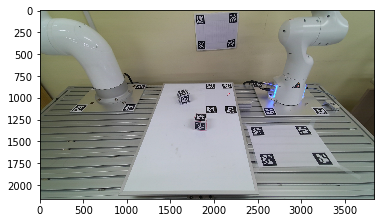

In [6]:
plt.imshow(kinect.get_image()[:,:,[2,1,0]]) # Transpose in the last dimension is for RGB-to-BGR conversion. (plt.imshow shows image in BGR order)

##### disconnect()

In [7]:
kinect.disconnect()

## 2.2. RealSense

In [8]:
from pkg.detector.camera.realsense import RealSense

##### create RealSense instance

In [9]:
realsense = RealSense()

##### initialize()

In [10]:
realsense.initialize()

Start streaming


##### get_config()
* This should return camera matrix (3x3) and distortion coefficients (4, 5, or 8 element vector).
* Distortion coefficients for RealSense is [0,0,0,0,0]

In [11]:
camera_matrix, dist_coeffs = realsense.get_config()
print("camera_matrix: {} \n {}".format(camera_matrix.shape, camera_matrix))
print("dist_coeffs: {} \n {}".format(dist_coeffs.shape, dist_coeffs))

camera_matrix: (3, 3) 
 [[1.39560388e+03 0.00000000e+00 9.62751587e+02]
 [0.00000000e+00 1.39531934e+03 5.47687012e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist_coeffs: (5,) 
 [0. 0. 0. 0. 0.]


##### get_image()
  * This will return camera image (RGB order)

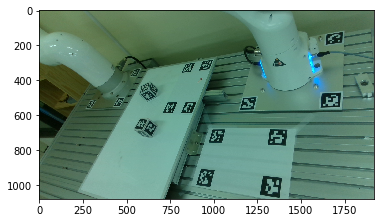

In [12]:
plt.imshow(realsense.get_image()[:,:,[2,1,0]]) # Transpose in the last dimension is for RGB-to-BGR conversion. (plt.imshow shows image in BGR order)

##### disconnect()

In [13]:
realsense.disconnect()

## 2.3. ArucoStereo

In [14]:
from pkg.detector.aruco.stereo import ArucoStereo
from pkg.detector.aruco.marker_config import get_aruco_map
from pkg.detector.camera.kinect import Kinect
from pkg.detector.camera.realsense import RealSense
from pkg.detector.detector_interface import DetectionLevel

##### create ArucoStereo instance

In [15]:
stereo = ArucoStereo(aruco_map=get_aruco_map(), 
                     camera_list=[Kinect(), RealSense()])

##### initialize()

In [16]:
stereo.initialize()

Device configuration: 
	color_format: 3 
	(0:JPG, 1:NV12, 2:YUY2, 3:BGRA32)

	color_resolution: 5 
	(0:OFF, 1:720p, 2:1080p, 3:1440p, 4:1536p, 5:2160p, 6:3072p)

	depth_mode: 3 
	(0:OFF, 1:NFOV_2X2BINNED, 2:NFOV_UNBINNED,3:WFOV_2X2BINNED, 4:WFOV_UNBINNED, 5:Passive IR)

	camera_fps: 2 
	(0:5 FPS, 1:15 FPS, 2:30 FPS)

	synchronized_images_only: False 
	(True of False). Drop images if the color and depth are not synchronized

	depth_delay_off_color_usec: 0 ms. 
	Delay between the color image and the depth image

	wired_sync_mode: 0
	(0:Standalone mode, 1:Master mode, 2:Subordinate mode)

	subordinate_delay_off_master_usec: 0 ms.
	The external synchronization timing.

	disable_streaming_indicator: False 
	(True or False). Streaming indicator automatically turns on when the color or depth camera's are in use.


Start streaming


##### calibrate()
* This calibrates relative displacement between two cameras. You need some ArUco markers in the field of view.
* The distance between two cameras tend to be calculated a few centimeters shorter than the actual distance.

In [17]:
config1, config2, T_c12 = stereo.calibrate()
print("T_c12: \n {}".format(np.round(T_c12, 2)))
print("\n")
print("Check Distance! - %.2f cm"%(np.round(np.linalg.norm(T_c12[:3,3])*100, 2)))

T_c12: 
 [[ 0.83 -0.02 -0.56  0.65]
 [ 0.17  0.96  0.21 -0.16]
 [ 0.53 -0.27  0.8   0.09]
 [ 0.    0.    0.    1.  ]]


Check Distance! - 67.18 cm


##### detect()
* level_mask - detects objects depending on levels
* name_mask - detects object with specified names

* visualize - visualize the detection result

In [21]:
print("Detect by Levels")
print("Robots on scene: {}".format(stereo.detect(level_mask=[DetectionLevel.ROBOT]).keys()))
print("Environments: {}".format(stereo.detect(level_mask=[DetectionLevel.ENVIRONMENT]).keys()))
print("Movable Objects: {}".format(stereo.detect(level_mask=[DetectionLevel.MOVABLE]).keys()))

print("Detect by Names")
detection_targets = ["floor"]
print("Try detect: {} - detected {}".format(detection_targets, stereo.detect(name_mask=detection_targets).keys()))

print("Detect and visualize - the detection result images from the two cameras will pop up")
stereo.detect(visualize=True)

Detect by Levels
Robots on scene: ['indy0', 'panda1']
Environments: ['track', 'wall', 'floor']
Movable Objects: ['box1', 'box2']
Detect by Names
Try detect: ['floor'] - detected ['floor']
Detect and visualize - the detection result images from the two cameras will pop up


{'box1': array([[ 0.07109344,  0.997457  , -0.00502227, -0.02617307],
        [-0.63297373,  0.04900521,  0.7726207 ,  0.06250047],
        [ 0.77090204, -0.0517493 ,  0.63484806,  0.6504791 ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],
       dtype=float32),
 'box2': array([[ 0.01949117, -0.9113816 , -0.41110042, -0.11456304],
        [ 0.77859956,  0.27178392, -0.56561124, -0.04549063],
        [ 0.6272183 , -0.30905822,  0.71489877,  0.78214633],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],
       dtype=float32),
 'floor': array([[ 0.99940425, -0.03257814, -0.01139397, -0.08713329],
        [-0.02963306, -0.64073956, -0.7671862 ,  0.09122582],
        [ 0.01769293,  0.7670668 , -0.64132327,  0.7574646 ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],
       dtype=float32),
 'indy0': array([[ 2.3734411e-02,  9.9971831e-01,  4.2974778e-05, -5.2317041e-01],
        [ 6.4484036e-01, -1.5276370e-02, -7.6416457e-01, -7.0911914e-02],
  

##### disconnect()

In [22]:
stereo.disconnect()